In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-sustainable-urban-living/sample_submission.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from tabulate import tabulate

#seaborn: statistical data visualization. 
#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

#%matplotlib inline

#To switch to seaborn defaults, simply call the set() function.
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [3]:
train = pd.read_csv("/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv")
testData = pd.read_csv("/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv")

> **Data Exploration and Data Cleaning**

In [4]:
print(train.shape)
print(train.info())

(31599, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      31599 non-null  object 
 1   Property_Type           31599 non-null  object 
 2   Property_Area           31599 non-null  int64  
 3   Number_of_Windows       30266 non-null  float64
 4   Number_of_Doors         31599 non-null  int64  
 5   Furnishing              30771 non-null  object 
 6   Frequency_of_Powercuts  30490 non-null  float64
 7   Power_Backup            31599 non-null  object 
 8   Water_Supply            31599 non-null  object 
 9   Traffic_Density_Score   31599 non-null  float64
 10  Crime_Rate              30970 non-null  object 
 11  Dust_and_Noise          30600 non-null  object 
 12  Air_Quality_Index       31599 non-null  float64
 13  Neighborhood_Review     31599 non-null  float64
 14  Habitability_score      31

In [5]:
train.head()

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


> **Identifying the target variable from the dataset**

In [6]:
y_train = train['Habitability_score']
X_train = train.drop('Habitability_score', axis=1)

In [7]:
y_train.shape, X_train.shape

((31599,), (31599, 14))

> **Exploring the number of unique values in each feature**

In [8]:
X_train.nunique().sort_values(ascending=False)

Id                        31599
Property_Area              4181
Traffic_Density_Score       762
Air_Quality_Index           443
Neighborhood_Review         410
Number_of_Windows            16
Property_Type                 6
Number_of_Doors               6
Water_Supply                  5
Frequency_of_Powercuts        4
Crime_Rate                    4
Furnishing                    3
Power_Backup                  3
Dust_and_Noise                3
dtype: int64

> > Since Id feature contains unique values as the each entry.I removed the feature "ID" from the dataset.

In [9]:
X_train.drop(['Id'], axis=1, inplace=True)

# **Feature Enginnering**

> Analysing Missing Values

In [10]:
def analyze_missing_values(data):
    # Calculate the number of missing values in each column
    missing_values_count = data.isnull().sum()

    # Calculate the percentage of missing values in each column
    missing_values_percentage = (missing_values_count / len(data)) * 100

    # Get the data types of each column
    data_types = data.dtypes

    # Create a DataFrame to store the results
    missing_values_info = pd.DataFrame({
        'Column': missing_values_count.index,
        'Data Type': data_types,
        'Missing Values Count': missing_values_count,
        'Missing Values Percentage': missing_values_percentage
    })

    # Display the missing_values_info DataFrame
    print("Missing Values Information:")
    display(missing_values_info)

In [11]:
analyze_missing_values(X_train)

Missing Values Information:


,Column,Data Type,Missing Values Count,Missing Values Percentage
Property_Type,Property_Type,object,0,0.000000
Property_Area,Property_Area,int64,0,0.000000
Number_of_Windows,Number_of_Windows,float64,1333,4.218488
Number_of_Doors,Number_of_Doors,int64,0,0.000000
Furnishing,Furnishing,object,828,2.620336
Frequency_of_Powercuts,Frequency_of_Powercuts,float64,1109,3.509605
Power_Backup,Power_Backup,object,0,0.000000
Water_Supply,Water_Supply,object,0,0.000000
Traffic_Density_Score,Traffic_Density_Score,float64,0,0.000000
Crime_Rate,Crime_Rate,object,629,1.990569


> > Soo we can not drop columns based on the missing value percentage as the missing value percentages are too small.

In [12]:
#concatenate x_train and y_train
train = pd.concat([X_train, y_train], axis=1)
features = train.columns[:-1]
print(features)

Index(['Property_Type', 'Property_Area', 'Number_of_Windows',
       'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts',
       'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate',
       'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review'],
      dtype='object')


> > > Separating features in the X_train data set for later use

In [13]:
features = train.columns[:-1]

> > Seperation of given Data frame into Numerical and categorical features for missing value imputations

In [14]:
numeric_data = X_train.select_dtypes(include=['float64', 'int64'])
categorical_data = X_train.select_dtypes(include=['object'])


# **Feature Enginnering**

> # **Numerical Data Analysis**

> > **Correlation Matrix**

> > > Creating a correlation chart to finally see which variables are correlated to each feature

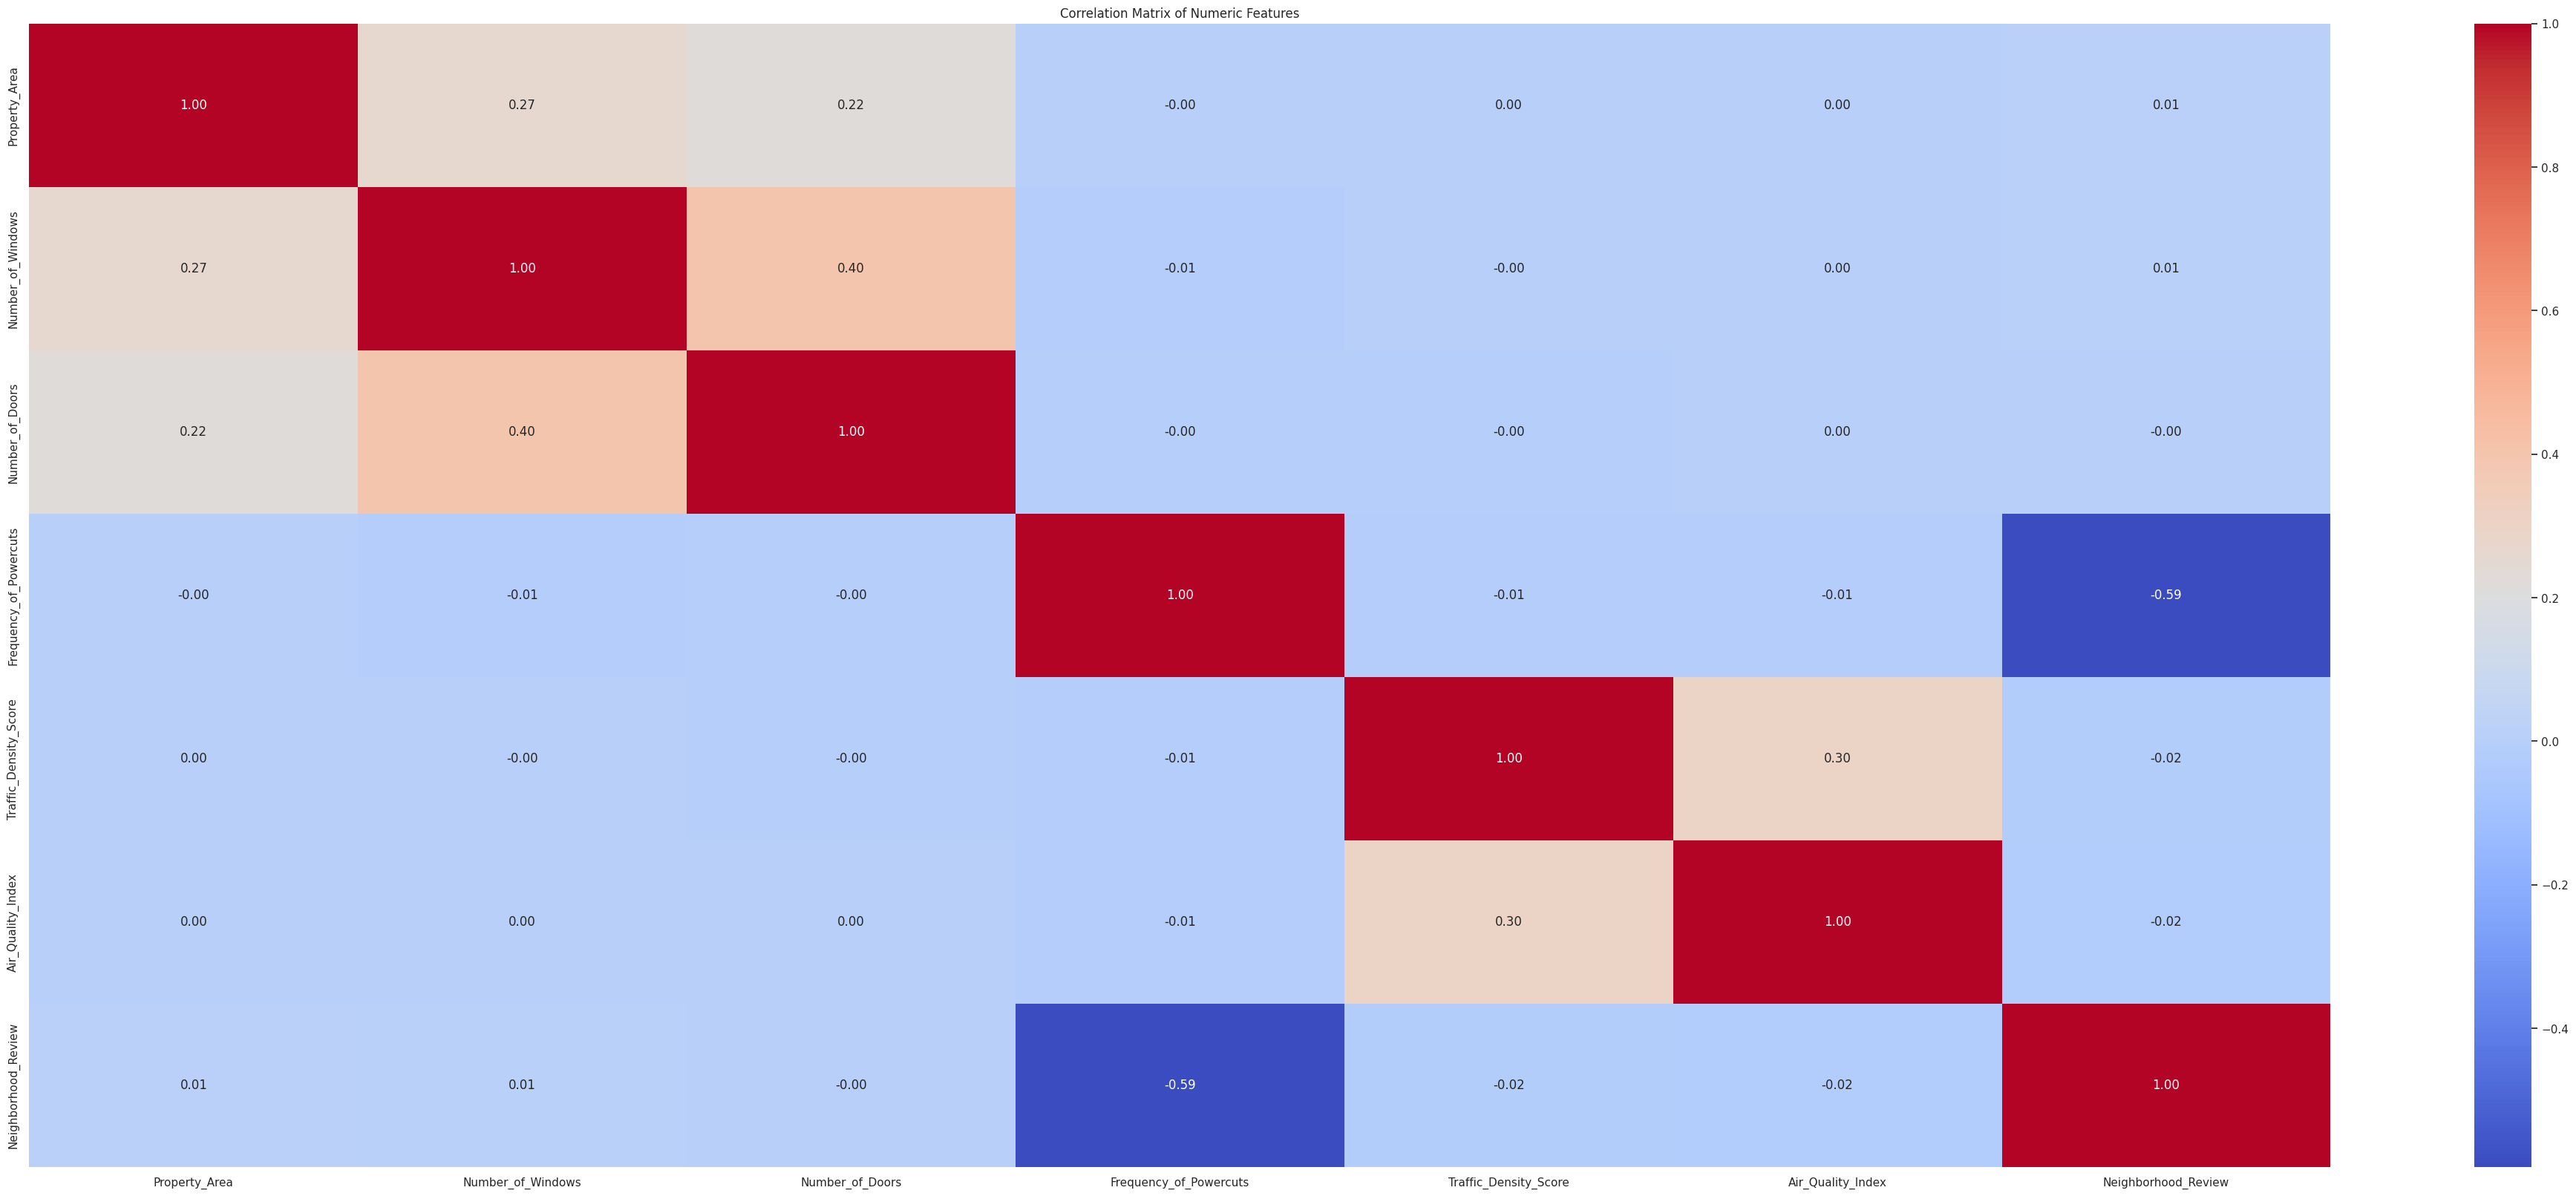

In [15]:
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

> > > Can not find features that are corelated with each other.

> > **Creating Histograms**

In [16]:
#creating histrograms for all the numerical values
def plot_histograms(data):
    """
    Function to plot histograms with bars for numerical features.
    """
    num_cols = 5
    num_features = len(data.columns)
    num_rows = (num_features - 1) // num_cols + 1
    
    plt.figure(figsize=(4 * num_cols, 4 * num_rows))

    for i, column in enumerate(data.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.hist(data[column], color='skyblue', bins=20)
        plt.title(column)

    plt.tight_layout()
    plt.show()

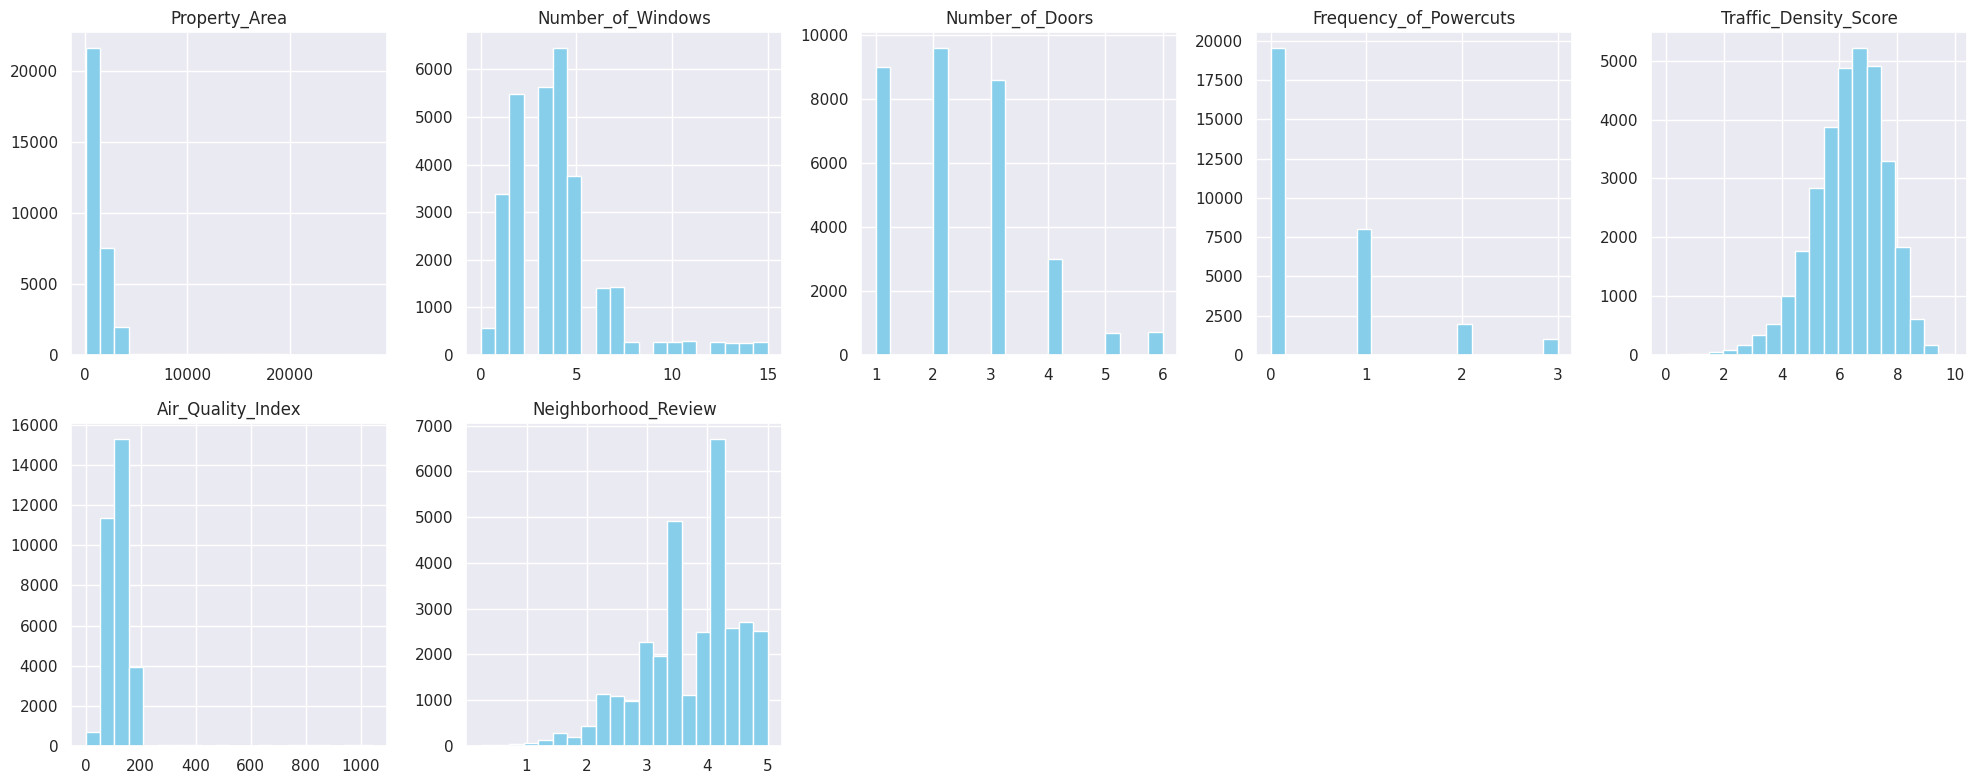

In [17]:
plot_histograms(numeric_data)

> > **Creating Boxplots**

In [18]:
#draw boxplots for all the numerical features for handle outliers
def plot_boxplots(data):
    """
    Function to plot boxplots for numerical features.
    """
    num_cols = 5
    num_features = len(data.columns)
    num_rows = (num_features - 1) // num_cols + 1
    
    plt.figure(figsize=(4 * num_cols, 4 * num_rows))

    for i, column in enumerate(data.columns):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(data[column], color='skyblue')
        plt.title(column)

    plt.tight_layout()
    plt.show()

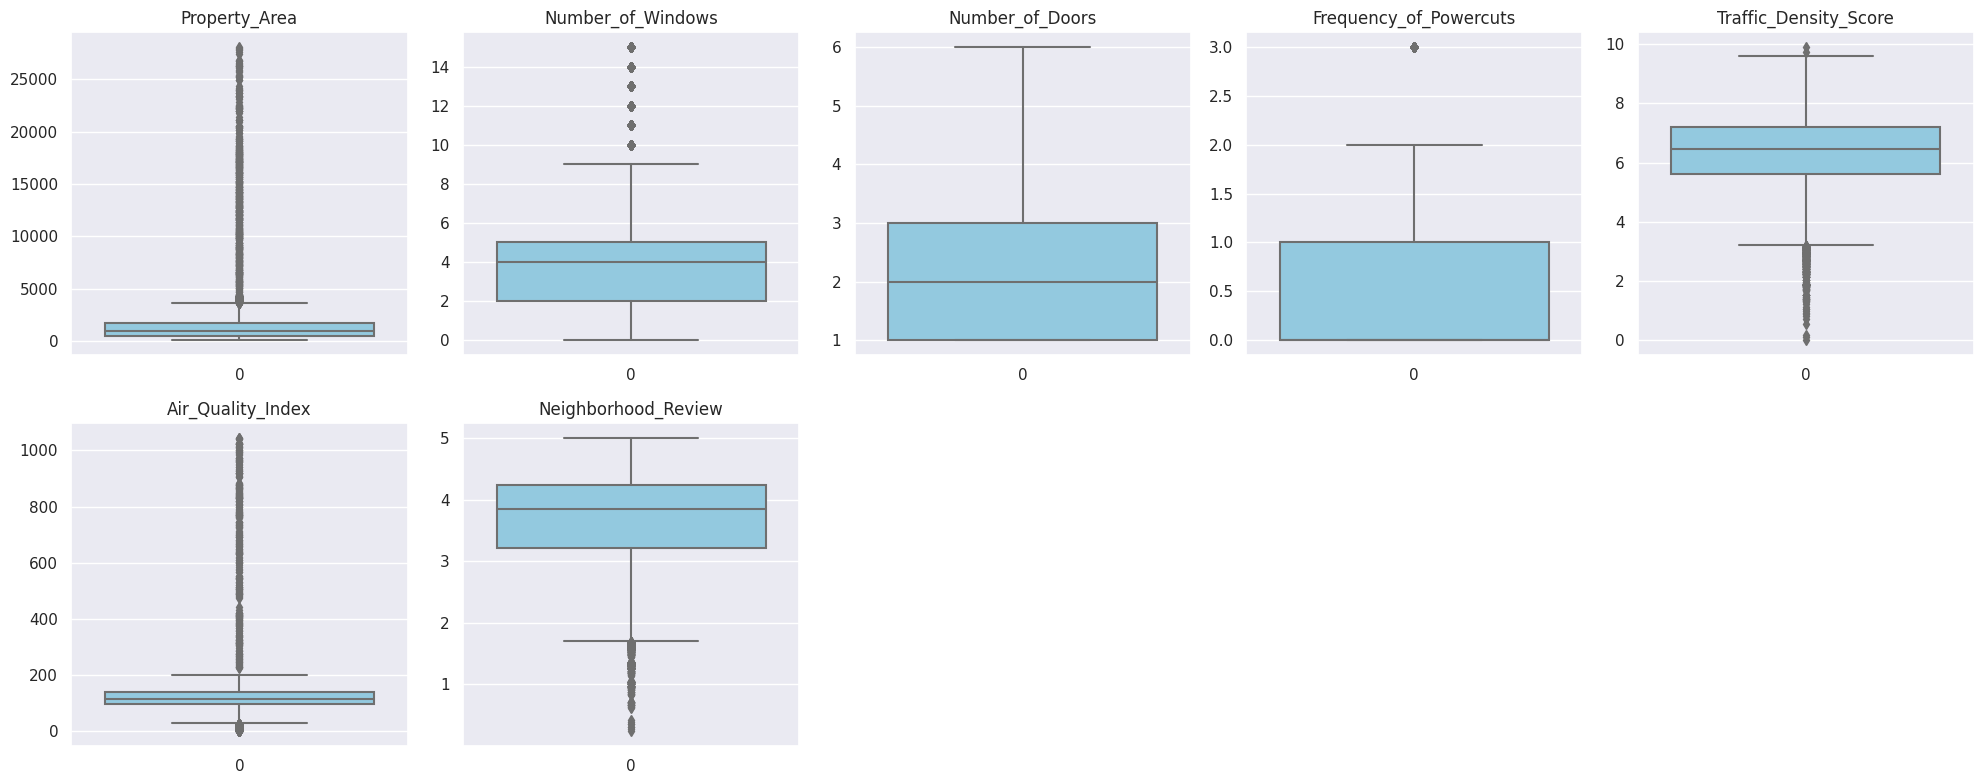

In [19]:
plot_boxplots(numeric_data)

> > **Imputing missing values**

> > I impute them by proceeding sequentially through features with missing values after considering above histograms

In [20]:
def mean_imputation(data):
    # Get the columns to impute (all numeric columns)
    columns_to_impute = data.select_dtypes(include=['number']).columns

    # Calculate the mean for each column
    means = data[columns_to_impute].mean()

    # Impute missing values with the calculated means
    data_imputed = data.copy()
    data_imputed[columns_to_impute] = data_imputed[columns_to_impute].fillna(means)

    return data_imputed

> > Since all the numerical features are skewed. I impute missing values using the mean of each feature

In [21]:
numeric_data = mean_imputation(numeric_data)

> > Checking whether the each numerical feature still containing any missing values

In [22]:
numeric_data.isnull().sum()

Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Frequency_of_Powercuts    0
Traffic_Density_Score     0
Air_Quality_Index         0
Neighborhood_Review       0
dtype: int64

> > Numerical Feature Scaling

In [23]:
#i need to scale the numeric data
from sklearn.preprocessing import StandardScaler

def scale_numeric_data(data):
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the data
    data_scaled = scaler.fit_transform(data)

    # Create a DataFrame with the scaled data
    data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

    return data_scaled

In [24]:
numeric_data = scale_numeric_data(numeric_data)

In [25]:
X_train = pd.concat([numeric_data, categorical_data], axis=1)
X_train.shape,y_train.shape

((31599, 13), (31599,))

#  **Categorical Data Analysis**

In [26]:
print(categorical_data.shape)
print(X_train.shape)
print(y_train.shape)
categorical_data.info()

(31599, 6)
(31599, 13)
(31599,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Property_Type   31599 non-null  object
 1   Furnishing      30771 non-null  object
 2   Power_Backup    31599 non-null  object
 3   Water_Supply    31599 non-null  object
 4   Crime_Rate      30970 non-null  object
 5   Dust_and_Noise  30600 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


> > **Imputing missing values**

> > I imputed all the missing values in each categorical feature using the mode of respective categorical column

In [27]:
def mode_imputation_categorical(data):
    # Get the columns to impute
    columns_to_impute = data.columns
    # Calculate the mode for each column
    modes = data.mode().iloc[0]
    # Impute missing values with the calculated modes
    data_imputed = data.copy()
    data_imputed[columns_to_impute] = data_imputed[columns_to_impute].fillna(modes)
    return data_imputed

In [28]:
categorical_data = mode_imputation_categorical(categorical_data)

> > Checking whether still categorical features containing missing values.

In [29]:
nan_counts = X_train.isnull().sum()

# Print the counts of NaN values in each column
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
Property_Area               0
Number_of_Windows           0
Number_of_Doors             0
Frequency_of_Powercuts      0
Traffic_Density_Score       0
Air_Quality_Index           0
Neighborhood_Review         0
Property_Type               0
Furnishing                828
Power_Backup                0
Water_Supply                0
Crime_Rate                629
Dust_and_Noise            999
dtype: int64


> > **Feature Encoding**

> > One Hot Encoding

> > I did One Hot encoding only to the "Property_Type". I didn't go to encode more others categorical features using one hot encoder since it will increase the dimensionality. 

In [30]:
def one_hot_encode(df, columns):
    for column in columns:
        one_hot = pd.get_dummies(df[column], prefix=column).astype(int)
        df = df.drop(column, axis=1)
        df = df.join(one_hot)
    return df

In [31]:
#now one hot encode these features  'Property_Type'
categorical_data = one_hot_encode(categorical_data,["Property_Type"])

> > Label Encoding

> > I did label encoding for 'Power_Backup', 'Water_Supply' features

In [32]:
from sklearn.preprocessing import LabelEncoder
def label_encode_columns(data, columns):
    """
    Perform label encoding for specified categorical columns in a DataFrame.
    """
    label_encoder = LabelEncoder()
    for col in columns:
        data[col] = label_encoder.fit_transform(data[col])
    return data

In [33]:
columns_to_encode = ['Power_Backup', 'Water_Supply']
categorical_data = label_encode_columns(categorical_data, columns_to_encode)

> > Ordinal Encoding

> > I did Ordinal Encoding for features "Dust_and_Noise","Furnishing","Crime_Rate"

In [34]:
Dust_and_Noise = {'High':2,'Medium':1, 'Low':0}
categorical_data['Dust_and_Noise'] = categorical_data['Dust_and_Noise'].map(Dust_and_Noise)

Furnishing = {'Unfurnished' :0,'Semi_Furnished' :1 ,'Fully Furnished':2}
categorical_data['Furnishing'] = categorical_data['Furnishing'].map(Furnishing)

Crime_Rate = {'Slightly below average':1, 'Well below average':0,'Well above average':3, 'Slightly above average':2}
categorical_data['Crime_Rate'] = categorical_data['Crime_Rate'].map(Crime_Rate)

In [35]:
display(categorical_data.head())

,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,1,1,3,1,1,0,1,0,0,0,0
1,0,1,2,0,1,0,1,0,0,0,0
2,2,1,3,1,1,0,1,0,0,0,0
3,0,2,3,3,1,0,1,0,0,0,0
4,2,1,0,0,1,0,0,1,0,0,0


In [36]:
#concatinate the numerical and categorical data
X_train = pd.concat([numeric_data, categorical_data], axis=1)

> > Checking Whether are there any missing value in y_train data set

In [37]:
y_train.isnull().sum()

0

Concatanating X_train & y_train after doing all data prepossessing and feature enginnering  techniques to the **train** data set

In [38]:
train = pd.concat([X_train, y_train], axis=1)

# **Splitting Train Data set to Train Data and Valid Data**

In the below code, I now split the data in to training and validation sets. Keeping 80% of the data as training and keeping aside 20% for validation to check how our model performs on never-seen data

In [39]:
#split trainData into train and valid
from sklearn.model_selection import train_test_split
X_train, X_valid,y_train,y_valid = train_test_split(X_train,y_train, test_size=0.2, random_state=20)

# **Model building**

**Importing Necessary Libraries**

In [40]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Defining a cross validation strategy**

Here I am trying to see which algorithms out of the four ( Linear Regression, Decision Tree, Random Forest and Gradient Boosting) will predict the best with lowest error. I cross validate our training data with 5 folds, get errors on each fold, and finally average those error so that we are really sure how the model performs for every record of the data. There can be variation in the distribution of the data and so cross validation is a preventive measure in overfitting of the model.

In [41]:
def evaluation_with_cv(model, train_x, train_y):
    # Cross-validated RMSE calculation
    rmse_cv = np.sqrt(-cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv=5)).mean()
    
    # Fit the model
    model.fit(train_x, train_y)
    
    # Make predictions
    predictions = model.predict(train_x)
    
    # Calculate evaluation metrics
    mae = round(mean_absolute_error(train_y, predictions),5)
    mse = round(mean_squared_error(train_y, predictions),5)
    rmse = round(np.sqrt(mse),5)
    r_squared = round(r2_score(train_y, predictions),5)
    
    return rmse_cv, mae, mse, rmse, r_squared

In [42]:
# Initialize the models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=20)
xgb = XGBRegressor(random_state=20)
tree_reg = DecisionTreeRegressor(random_state=20)
lasso_reg = Lasso(random_state=20)
gb_reg = GradientBoostingRegressor(random_state=20)
lgb_reg = lgb.LGBMRegressor(random_state=20)
mlp_reg = MLPRegressor(random_state=20)

In [43]:
# Evaluate the models
linear_reg_results = evaluation_with_cv(linear_reg, X_train, y_train)
random_forest_results = evaluation_with_cv(random_forest, X_train, y_train)
xgb_results = evaluation_with_cv(xgb, X_train, y_train)
tree_reg_results = evaluation_with_cv(tree_reg, X_train, y_train)
lasso_reg_results = evaluation_with_cv(lasso_reg, X_train, y_train)
gb_reg_results = evaluation_with_cv(gb_reg, X_train, y_train)
lgb_reg_results = evaluation_with_cv(lgb_reg, X_train, y_train)
mlp_reg_results = evaluation_with_cv(mlp_reg, X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1061
[LightGBM] [Info] Number of data points in the train set: 20223, number of used features: 18
[LightGBM] [Info] Start training from score 73.464730
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 20223, number of used features: 18
[LightGBM] [Info] Start training from score 73.524471
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

In [44]:
# Create a DataFrame with the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Decision Tree', 'Lasso','Gradient Boosting','LightGBM','MLP'],
    'RMSE (CV)': [linear_reg_results[0], random_forest_results[0], xgb_results[0], tree_reg_results[0], lasso_reg_results[0], gb_reg_results[0], lgb_reg_results[0], mlp_reg_results[0]],
    'MAE': [linear_reg_results[1], random_forest_results[1], xgb_results[1], tree_reg_results[1], lasso_reg_results[1], gb_reg_results[1], lgb_reg_results[1], mlp_reg_results[1]],
    'MSE': [linear_reg_results[2], random_forest_results[2], xgb_results[2], tree_reg_results[2], lasso_reg_results[2], gb_reg_results[2], lgb_reg_results[2], mlp_reg_results[2]],
    'RMSE': [linear_reg_results[3], random_forest_results[3], xgb_results[3], tree_reg_results[3], lasso_reg_results[3], gb_reg_results[3], lgb_reg_results[3], mlp_reg_results[3]],
    'R^2': [linear_reg_results[4], random_forest_results[4], xgb_results[4], tree_reg_results[4], lasso_reg_results[4], gb_reg_results[4], lgb_reg_results[4], mlp_reg_results[4]]
})

# Display the results
print("Evaluation Metrics:")
display(results)

Evaluation Metrics:


,Model,RMSE (CV),MAE,MSE,RMSE,R^2
0,Linear Regression,9.340663,7.46536,87.09808,9.33264,0.56477
1,Random Forest,6.061365,1.70082,5.07689,2.25320,0.97463
2,XGBoost,6.357820,3.81130,23.83185,4.88179,0.88091
3,Decision Tree,8.382184,0.00000,0.00000,0.00000,1.00000
4,Lasso,10.014476,7.55409,100.24794,10.01239,0.49906
5,Gradient Boosting,7.104601,5.57885,48.75815,6.98270,0.75636
6,LightGBM,6.207474,4.51449,32.88034,5.73414,0.83570
7,MLP,6.357351,4.79884,37.25716,6.10386,0.81383


From the above way, we see that Random Forest works the best for our data with the lowest RMSE(CV) value.
After that we can predict that XGBRegressor,LGBMRegressor and  MLPRegressor(Neural Network Regressor) have the lowest RMSE(CV) value in descending order

Then I will now move on with hyper parameter tuning the parameters of Random Forest Regressor and XGBRegressor. Model hyperparametrs tell us how the model is structured , it controls the behaviour of the training algorithm. There is no one specific way on how to tune hyperparameters, but the best way is to use GridSearchCV. 

Here I used  all the Grid Search, Random Search and Manual Tuning  for hyperparameter Tuning to obtain a good accurate model for both Random Forest Regressor and XGB regressor models.

# **Hyper Parameter Tuning For RandomForest Regressor**

Sample Grid Search CV implemetation for random forest regressor.

In [45]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [1000, 1100, 1200],
#     'max_depth': [10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [8, 10,12],
# }

# # Create a base model
# rf = RandomForestRegressor(random_state=20, n_jobs=4)

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=4, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

Sample Random search implementation for Random Forest Regressor

In [46]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define the parameter distribution
# param_dist = {
#     'n_estimators': randint(1000, 1200),
#     'max_depth': randint(10, 20),
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 4),
#     'max_features': ['auto', 10],
# }

# # Create a base model
# rf = RandomForestRegressor(random_state=20, n_jobs=4)

# # Instantiate the random search model
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, random_state=20, n_jobs=4, verbose=2)

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_

Actually,Most of the time I used random Search and manual tuninf for hyperparameter tuning since Grid Search is an exhoustive Method

# **Well Optimized Random Forest Regressor Model I obtained after following above teachniques:**

In [47]:
rf_model = RandomForestRegressor(max_depth=15, max_features=10, min_samples_split=5, n_estimators=1100, n_jobs=4, random_state=20)

# **Hyper Parameter Tuning For XGB Regressor Model**

This is also like the preivious way.I used Ranom Search,Grid Search and Manual Tuning methods for the hyperparameter optimization in XGB Regressor Model.I will show sample code below.

Sample Grid Search CV implemetation for XGB Regressor Model

In [48]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [1900, 2000, 2100],
#     'max_depth': [10, 15, 20],
#     'learning_rate': [0.003, 0.01, 0.05, 0.1],
#     'gamma': [0.1, 0.2, 0.3],
#     'subsample': [0.6, 0.7, 0.8],
#     'colsample_bytree': [1, 0.9, 0.8],
#     'num_parallel_tree': [3, 4, 5],
#     'random_state': [30],
# }

# # Create a base model
# xgb = XGBRegressor()

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=4, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

Sample Random search implementation for XGB Regressor Model

# **Well Optimized RXGB Regressor Model I obtained after following above teachniques:**

<!-- from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(1800, 2000),
    'max_depth': randint(5, 15),
    'learning_rate': uniform(0.001, 0.01),
    'gamma': uniform(0, 0.2),
    'subsample': uniform(0.4, 0.6),
    'colsample_bytree': uniform(0.8, 0.2),
    'num_parallel_tree': randint(1, 5),
    'random_state': [30],
}

# Create a base model
xgb = XGBRegressor()

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, cv=3, random_state=20, n_jobs=4, verbose=2)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_ -->

In [49]:
xgb_model = XGBRegressor(colsample_bytree=1, gamma=0.1, learning_rate=0.003, max_depth=10, n_estimators=1900, num_parallel_tree=3, random_state=30, subsample=0.6,n_jobs=4)

**I tried to train the each model separately and apply that model to valid data set.But I wasn't able to take a score less than 6.02881**

**Then I tried for stacking Models to increase the overall performance.**

I used **StackedRegressor** for ensembling purpose.

Before that I have innitiated another two based models **LGBMRegressor** and **MLPRegressor** as below other than **RandomForest Regressor** and **RXGB Regressor**

In [50]:
lgb_model = LGBMRegressor(n_estimators=1000, num_leaves=100, learning_rate=0.01, random_state=20, n_jobs=4)

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=20)

In [51]:
from sklearn.ensemble import StackingRegressor
estimators = [('rf', rf_model), ('xgb', xgb_model), ('mlp', mlp_model), ('lgb', lgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), n_jobs=4)

# **Ensembling StackedRegressor,RandomForest Regressor, XGBoost,MLPRegressor and LightGBM**

In [52]:
from sklearn.ensemble import StackingRegressor
estimators = [('rf', rf_model), ('xgb', xgb_model), ('mlp', mlp_model), ('lgb', lgb_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), n_jobs=4)

**Fitting The Model**

In [53]:
stacking_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 20223, number of used features: 18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overh

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=15,
                                                     max_features=10,
                                                     min_samples_split=5,
                                                     n_estimators=1100,
                                                     n_jobs=4,
                                                     random_state=20)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_m...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1900, n_jobs=4,
                                            num_parallel_tree=3,
                                            random_state=30, ...)),
                              ('mlp',
                               MLPRegressor(hidden_layer_sizes=(100, 100),
                                            max_iter=1000, random_state=20)),
                              ('lgb',
                               LGBMRegressor(learning_rate=0.01,
                                             n_estimators=1000, n_jobs=4,
                                             num_leaves=100,
                                             random_state=20))],
                  final_estimator=LinearRegression(), n_jobs=4)

# **Valid Data**

**Making predictions on the  validation dataset  using  stacking model**

In [54]:
y_pred_valid = stacking_model.predict(X_valid)

**Checking the accuracy of the model based on the validation data**

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

mse = mean_squared_error(y_valid, y_pred_valid)
rmse = sqrt(mse)
mae = mean_absolute_error(y_valid, y_pred_valid)
r2 = r2_score(y_valid, y_pred_valid)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 score: {round(r2, 3)}")

Mean Absolute Error (MAE): 4.327133883492509
Root Mean Squared Error (RMSE): 5.554273684867802
Mean Squared Error (MSE): 30.849956166414945
R^2 score: 0.846


Here I used a scatter Diagram to take a idea about the trained model's prediction

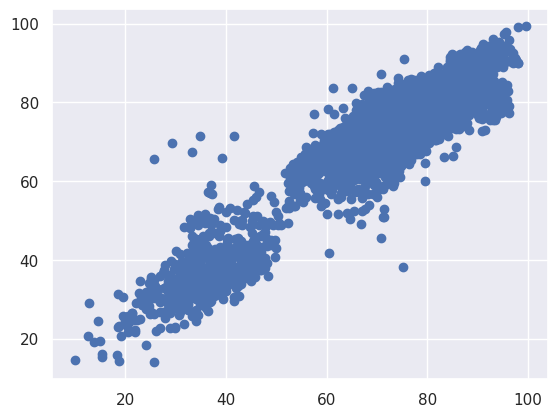

In [56]:
plt.scatter(y_valid, y_pred_valid)

# **Test Data**

**First Of all I explored or analysed the Test Data**

In [57]:
print(testData.shape)
print(testData.info())

(7900, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7900 entries, 0 to 7899
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      7900 non-null   object 
 1   Property_Type           7900 non-null   object 
 2   Property_Area           7900 non-null   int64  
 3   Number_of_Windows       7579 non-null   float64
 4   Number_of_Doors         7900 non-null   int64  
 5   Furnishing              7686 non-null   object 
 6   Frequency_of_Powercuts  7626 non-null   float64
 7   Power_Backup            7900 non-null   object 
 8   Water_Supply            7900 non-null   object 
 9   Traffic_Density_Score   7900 non-null   float64
 10  Crime_Rate              7742 non-null   object 
 11  Dust_and_Noise          7680 non-null   object 
 12  Air_Quality_Index       7900 non-null   float64
 13  Neighborhood_Review     7900 non-null   float64
dtypes: float64(5), int64(2), obje

Equalling the Features in Test Data with the features remained after prepossessing Train Data

In [58]:
testData = pd.DataFrame(testData[features])

# **Below I have done the same feature engineering methods to the Test data that I did for the Train Data**

In [59]:
numeric_data = testData.select_dtypes(include=['float64', 'int64'])
categorical_data = testData.select_dtypes(include=['object'])

In [60]:
numeric_data = mean_imputation(numeric_data)

In [61]:
numeric_data = scale_numeric_data(numeric_data)

In [62]:
testData = pd.concat([numeric_data, categorical_data], axis=1)

In [63]:
categorical_data = mode_imputation_categorical(categorical_data)

In [64]:
Dust_and_Noise = {'High':2,'Medium':1, 'Low':0}
categorical_data['Dust_and_Noise'] = categorical_data['Dust_and_Noise'].map(Dust_and_Noise)

Furnishing = {'Unfurnished' :0,'Semi_Furnished' :1 ,'Fully Furnished':2}
categorical_data['Furnishing'] = categorical_data['Furnishing'].map(Furnishing)

Crime_Rate = {'Slightly below average':1, 'Well below average':0,'Well above average':3, 'Slightly above average':2}
categorical_data['Crime_Rate'] = categorical_data['Crime_Rate'].map(Crime_Rate)

In [65]:
#one hot encode these features  'Property_Type'
categorical_data = one_hot_encode(categorical_data,["Property_Type"])

In [66]:
columns_to_encode = ['Power_Backup', 'Water_Supply']
categorical_data = label_encode_columns(categorical_data, columns_to_encode)

In [67]:
#concatinate the numerical and categorical data
testData = pd.concat([numeric_data, categorical_data], axis=1)

# **Final Training and Prediction**

**So the In here I do the prediction using stacking_model that I created previously**

In [68]:
y_prediction = stacking_model.predict(testData)

Submission

In [69]:
pred = pd.DataFrame(y_prediction)
sub_df = pd.read_csv('/kaggle/input/ml-olympiad-sustainable-urban-living/sample_submission.csv')
finaldataframe = pd.concat([sub_df['Id'], pred], axis=1)
finaldataframe.columns = ['Id', 'Habitability_score']
finaldataframe.to_csv('210329E-Final_Submission.csv', index=False)

**Finally ,I was able to take a score of 5.67223.**